Xicheng Xia

# Behavioral Finance

Consider a Barberis, Huang and Santos (2001) economy with the following parameter choices for the investor's utility function:
$$
\delta=0.99,\gamma=1,\lambda=2
$$
Consumption growth has a lognormal distribution:
$$
ln\widetilde{g}=0.02+0.02\widetilde{\epsilon}
$$
where epsilon is a standard normal random variable. With these parameter choices, the risk-free rate is constant at 1.0303 per year. Simulate the distribution for consumption growth with at least 10,000 random draws for epsilon. 

Define x as one plus the dividend-price ratio for the market portfolio:
$$
x=\left(1+\frac{P}{D}\right)\frac{D}{P}=1+\frac{D}{P}
$$

and define the error term:

$$
e(x)=0.99b0\mathbb{E}\left[\hat{\nu}\left(x\widetilde{g}\right)\right]+0.99x−1
$$

 where 
$$
\hat{\nu}\left(R\right)=R−1.0303 \quad for\quad R≥1.0303
$$

$$
\hat{\nu}(R)=2(R−1.0303)\quad for\quad R<1.0303
$$
Calculate the equilibrium values of x for b0 in the range [0, 10], using an iterative procedure known as bisection search:

*    Set x- = 1 and x+ = 1.1. Use the simulated distribution of consumption growth to confirm that e(x-) < 0 and e(x+) > 0. Hence solution for x must lie between x- and x+.
*    Set x = 0.5*(x- + x+), and use the simulated distribution of consumption growth to calculate e(x).
*    If |e(x)| < 10-4, then x is (close enough to) the solution.
*    Otherwise, if e(x) < 0, then the solution lies between x and x+, so repeat the procedure from step 2 with x- = x.
*    Otherwise, if e(x) > 0, then the solution lies between x- and x, so repeat the procedure from step 2 with x+ = x.

Use x to calculate the price-dividend ratio for the market portfolio:
$$
\frac{P}{D}=\frac{1}{x−1}
$$
Plot the price-dividend ratio (on the y axis) vs b0 (on the x axis). 

Also, calculate the expected market return:
$$
\mathbb{E}\left[R_m\right]=\mathbb{E}\left[x\widetilde{g}\right]
$$
Plot the equity premium (on the y axis) vs b0 (on the x axis). 

Briefly explain the economic significance of the investor's utility function, as well as the economic significance of parameters b0 and lambda.

Please submit your results (including graphs and qualitative discussion of economic significance) and programming code to the submission folder for Homework 5 before 7:15 p.m. on Wednesday, 28 November.

Economic Significance:

*    Investor's utility function combines power utility for consumption with prospect theory for utility from recent financial gains or losses.

*    Recent financial gains or losses are measured relative to reference level determined by risk-free rate.

*    Lambda controls degree of loss aversion for utility from recent financial gains or losses, while b0 controls balance between utility of consumption and utility from recent financial gains or losses.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.facecolor'] = '1.'

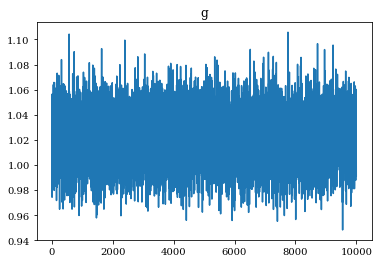

In [3]:
# lock the random
np.random.seed(1)

# simulate epsilon
epsilon = np.random.randn(10000, 1)

# calculate ln(g)
ln_g = 0.02 + 0.02 * epsilon

# calculate g
g = np.exp(ln_g)

plt.plot(g)
plt.title('g')
plt.show()

In [4]:
M = 0.99 * g**(-1)

PD = np.mean( 0.99*g**(1 - 1) )

#x = 1 + 1/PD

In [5]:
def e(x, b0, lambd = 2): 
    
    def v(array):
        ind0 = array >= 1.0303
        ind1 = array < 1.0303

        value = np.zeros(array.shape)
        value[ind0] = array[ind0] - 1.0303
        value[ind1] = lambd*( array[ind1] - 1.0303 )
        
        return value
    
    error = 0.99*b0*( np.mean(v(x*g)) ) + 0.99*x - 1
    
    return error

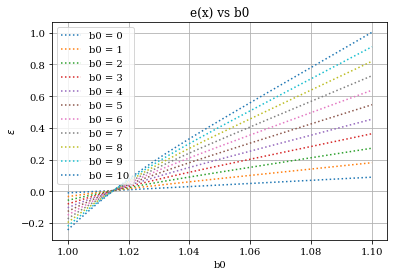

In [6]:
x_range = np.arange(1., 1.1, 0.0001)
for b in range(11):
    plt.plot(x_range, [e(x, b) for x in x_range ],':', label = 'b0 = %s'%b)
plt.legend(loc = 'best')
plt.title('e(x) vs b0')
plt.xlabel('b0')
plt.ylabel('$\\epsilon$')
plt.grid()
plt.show()

In [7]:
def bisection_search(function, guess_minus, guess_plus):
    '''Bisection search optimization
    Find out the x_ that makes function(x_) appoaximate to 0 (1e-4).
    *function* must be continuous. 
    *function(guess_minus)* and *function(guess_plus)* must have opposite signs.
    
    Input:
    --- function: The objective function to be optimized.
                fun(x, *args) -> 0
                
    --- guess_minus: One end of the bracketing interval [x-, x+].
                float or integer
    
    --- guess_plus: One end of the bracketing interval [x-, x+].
                float or integer
            
    Output:
    --- x_: optimal x that satisfies fun(x, *args) -> 0
                float
    '''
    # guarantee the optimal x is in [x-, x+]
    assert function(guess_minus)*function(guess_plus)<0,\
    '*function(guess_minus)* and *function(guess_plus)* must be sign changing values'
    
    # switch the position if the negative and positive bound are reversed
    if function(guess_minus) > 0:
        guess_minus,  guess_plus = guess_plus, guess_minus
    
    # assign the current optimal guess to x_
    if abs( function(guess_minus) ) > abs( function(guess_plus) ):
        x_ = guess_plus
    else:
        x_ = guess_minus
    
    # optimization goal is 1e-4
    while abs( function(x_) ) > 1e-4:
        # take the midpoint as new bound.
        x_ = (guess_plus + guess_minus)/2
        
        # update guess_plus/guess_minus
        if function(x_) > 0:
            guess_plus = x_ 
        else:
            guess_minus = x_
            
    return x_

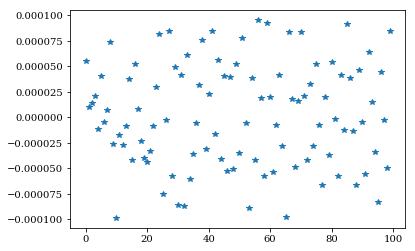

In [8]:
b_array = np.arange(0, 10, 0.1)

x_array = np.array( [bisection_search(lambda x, b0 = b: e(x, b0), 1., 1.1 ) for b in b_array ] )

PD_array = np.array( [1/(x - 1) for x in x_array] )

ERM_array = np.array( [np.mean(x*g) for x in x_array] )

Rf = 1/np.mean(0.99*g**(- 1))

plt.plot([e(x, b) for x, b in zip(x_array, b_array)], '*')
plt.show()

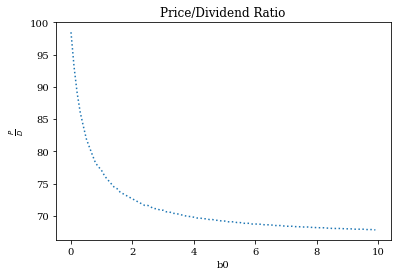

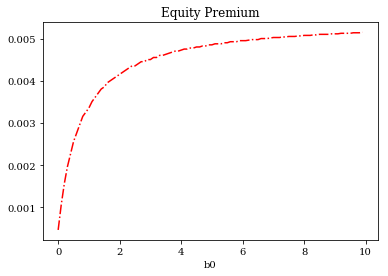

In [9]:
plt.plot(b_array, PD_array, ':' )
plt.title('Price/Dividend Ratio')
plt.xlabel('b0')
plt.ylabel('$\\frac{P}{D}$')
plt.show()

plt.plot( b_array, ERM_array - Rf, 'r-.' )
plt.title('Equity Premium')
plt.xlabel('b0')
plt.show()

* The utility function is the summation of the utility of comsumption and utility of recent financial gain or loss. 
* b0 measures th degree of prospect effect. A higher b0 means more impact of recent gain or loss on investor's utility (relative to consumption).
* $\lambda$ measures the degree of loss reversion. $\lambda$ larger than 1 means one loss more satisfaction when suffering from certain amount of loss compared to gain the same amount of profit.

In [1]:
from scipy.stats import norm

In [4]:
norm.ppf(0.05)

-1.6448536269514729

In [4]:
df = pd.DataFrame( np.arange(10).reshape(5, -1) )
df

,0,1
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


In [8]:
df.where(df>5, -1)

,0,1
0,-1,-1
1,-1,-1
2,-1,-1
3,6,7
4,8,9


array([0., 0., 0., 0., 0., 0., 0., 0., 0.])